In [23]:
from keras.datasets import mnist
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Dropout
import random
import matplotlib.pyplot as plt

rows = 28 # number of pixels in a row
cols = 28 # number of pixels in a column
labels = 10 # number of possible options (0-9)

def data_summary(trainX, trainY, testX, testY): # data summary function
  print('\nTrain images shape:', trainX.shape)
  print('Train labels shape:', trainY.shape)
  print('Test images shape:', testX.shape)
  print('Test labels shape:', testY.shape)
  print('\nTrain labels:\n', trainY)
  print('\nTest labels:\n', testY)

In [24]:
(trainX, trainY), (testX, testY) = mnist.load_data()
  #trainX contains a 28x28 array representing the images
  #trainY contains the labels of the dataset as an integer vector

data_summary(trainX, trainY, testX, testY)


Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)

Train labels:
 [5 0 4 ... 5 6 8]

Test labels:
 [7 2 1 ... 4 5 6]


In [25]:
trainX = trainX.reshape((trainX.shape[0], rows * cols))
  # reshapes trainX from a list of 2D arrays into a list of 1D arrays
  # trainX.shape[0] represents the 60000 entires
  # rows * columns turns the 28x28 2D array into a 784 1D array
trainX = trainX.astype('float32') / 255
  # casts trainX to the 'float32' data type
  # divides every value by 255 to normalize the data to [0, 1]
testX = testX.reshape((testX.shape[0], rows * cols))
testX = testX.astype('float32') / 255

trainY = to_categorical(trainY, labels)
  # converts the integer vector into one-hot vectors
  # [3] --> [0, 0, 1] 
testY = to_categorical(testY, labels)

data_summary(trainX, trainY, testX, testY)


Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)

Train labels:
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]

Test labels:
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
model = Sequential() # linear stack of Keras layers
model.add(Dense(16, input_dim = (rows * cols), activation = 'relu')) # dense layer with 16 neurons, ReLU activation, and 784 input parameters
model.add(Dense(32, activation = 'relu')) # dense layer with 32 neurons and ReLU activation
model.add(Dense(10, activation = 'softmax')) # dense layer with 10 neurons and softmax activation for multi-class classification

In [27]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy']) 
  # configues the model before training
  # rmsprop optimization
  # multi-class classification loss function

model.fit(trainX, trainY, epochs = 5, batch_size = 64)
  # trains the model with the trainX images and trainY labels
  # trains the model 5 times on the dataset
  # 64 samples per gradient update

Epoch 1/5
938/938 [==============================] - 3s 2ms/step - loss: 0.4643 - accuracy: 0.8718
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2418 - accuracy: 0.9302
Epoch 3/5
938/938 [==============================] - 2s 3ms/step - loss: 0.2077 - accuracy: 0.9407
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1876 - accuracy: 0.9460
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.1729 - accuracy: 0.9499


In [28]:
_, accuracy = model.evaluate(trainX, trainY)
  # evaluates performance of the model with the trainX images and trainY labels
  # _, to ignore loss value
  
print('Accuracy: %.2f' % (accuracy * 100)) #prints accuracy as a percentage

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1648 - accuracy: 0.9527
Accuracy: 95.27



TEST DATASET RESULTS:
313/313 [==============================] - 1s 3ms/step
Example: 9205


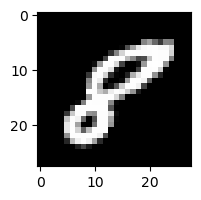

=> 8 (expected 8)

Example: 1917


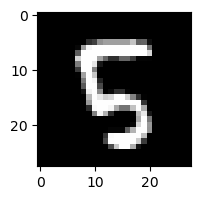

=> 8 (expected 5)

Example: 1787


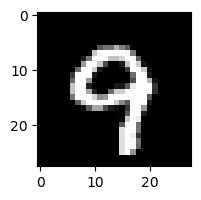

=> 9 (expected 9)

Example: 5470


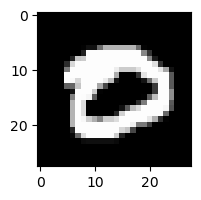

=> 0 (expected 0)

Example: 9598


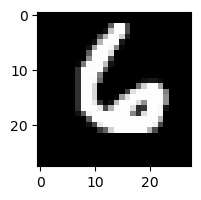

=> 6 (expected 6)

Example: 697


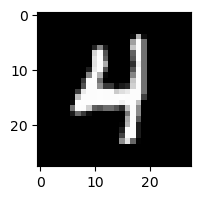

=> 4 (expected 4)

Example: 3197


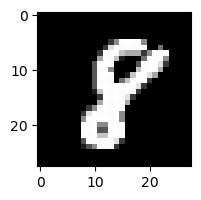

=> 8 (expected 8)

Example: 6997


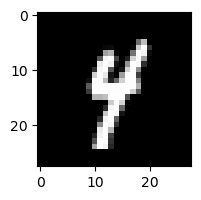

=> 4 (expected 4)

Example: 7747


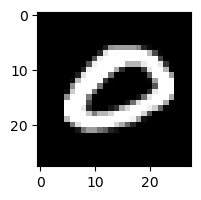

=> 0 (expected 0)

Example: 5767


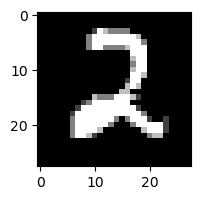

=> 2 (expected 2)



In [29]:
print('\nTEST DATASET RESULTS:')
predictions = (model.predict(testX) > 0.5).astype(int)
  # makes predictions on the testX images
  # threshold at 0.5 to produce binary predictions

plt.rcParams['figure.figsize'] = (2, 2)
  # sets myplotlib image size

for i in range(10):
  rNUM = random.randrange(0, len(testX)) # loops 10 random testX images
  plt.imshow(testX[rNUM].reshape(28, 28), cmap='gray', interpolation='none') # reshapes testX image into a 28x28 2D array and plots it with myplotlib
  print('Example:', rNUM) # prints example number
  plt.show() # plots example
  print('=> %d (expected %d)\n' % (np.argmax(predictions[rNUM]), np.argmax(testY[rNUM])))
    # prints the models prediction and the correct lable for the current example
    # prediction is obtained by taking the argmax of the predictions array for the current example
    # label is obtained by taking the argmax of the one-hot label array for the current example
    # %d are integer placeholders
    # argmax returns the index of the maximum value in an array